In [1]:
%load_ext autoreload 
%autoreload 2

from imports import *
import queue_system as qs
from queue_system import *

seed = random.seed(10)
seed_np = np.random.seed(10)

import torch

## Import values

In [2]:
# in weights_actor_critic5_ ci sta quello del plot

In [3]:
with open('values/V_agg.pkl', "rb") as fp: 
    V_agg = pickle.load(fp)
with open('values/V_star.pkl', "rb") as fp: 
    V_star = pickle.load(fp)
with open('values/V_opt.pkl', "rb") as fp: 
    V_opt = pickle.load(fp)
with open('values/V_exp.pkl', "rb") as fp: 
    V_exp = pickle.load(fp)

## Import weights

In [4]:
weights_actor_critic1, weights_actor_critic2 = [], []
weights_actor_critic3, weights_actor_critic4 = [], []
num_simulations = 10

for n in range(num_simulations):
    with open('weights/weights_actor_critic2_' + str(n) + '.pkl', "rb") as fp: #3
        weights_actor_critic1.append(pickle.load(fp))
        
    with open('weights/weights_actor_critic0_' + str(n) + '.pkl', "rb") as fp: #3
        weights_actor_critic2.append(pickle.load(fp))
        
    with open('weights/weights_actor_critic1_' + str(n) + '.pkl', "rb") as fp: #3
        weights_actor_critic3.append(pickle.load(fp))
        
    with open('weights/weights_actor_critic6_' + str(n) + '.pkl', "rb") as fp: #3
        weights_actor_critic4.append(pickle.load(fp))

In [5]:
# for n in range(num_simulations):
#     del weights_actor_critic1[n]['-1'] 
#     del weights_actor_critic2[n]['-1'] 
#     del weights_actor_critic3[n]['-1'] 
#     del weights_actor_critic4[n]['-1']

model = StochasticMatching(graph, arrival_rates, queue_max)

In [6]:
# model = StochasticMatching(graph, arrival_rates, queue_max)

# estimated_values = []

# for policy in tqdm(weights_actor_critic[0].values()):
#     estimated_values.append(model.run_simulation(policy, experts, eta, discount, cLI))

In [7]:
%%time

rewards_agg_b_expw1, rewards_agg_b_expw2 = [], []
rewards_agg_b_expw3, rewards_agg_b_expw4 = [], []

state_space_tensor = torch.FloatTensor(model.state_space).unsqueeze(0)

for n in range(num_simulations):
    
    rewards_agg_b_expw1.append([])
    rewards_agg_b_expw2.append([]) 
    rewards_agg_b_expw3.append([]) 
    rewards_agg_b_expw4.append([]) 
            
    for policy in tqdm(weights_actor_critic1[n].values()):
        
#         policy.eval()
            
#         with torch.no_grad():
#             weights = policy(state_space_tensor).numpy()
       
        P_agg, r_agg = compute_transitions_and_rewards_avg(policy)
        V_agg = compute_value_bellman(P_agg, r_agg)
        V_agg_pi0 = 0
        for i in range(len(verteces)):
            state = np.zeros(len(verteces))
            state[i] += 1
            ind = str(val_list.index(tuple(state)))
            V_agg_pi0 += prob_arrival[i] * V_agg[int(ind)]
        rewards_agg_b_expw1[-1].append(V_agg_pi0)
        
    for policy in tqdm(weights_actor_critic2[n].values()):
        
#         policy.eval()
            
#         with torch.no_grad():
#             weights = policy(state_space_tensor).numpy()
       
        P_agg, r_agg = compute_transitions_and_rewards_avg(policy)
        V_agg = compute_value_bellman(P_agg, r_agg)
        V_agg_pi0 = 0
        for i in range(len(verteces)):
            state = np.zeros(len(verteces))
            state[i] += 1
            ind = str(val_list.index(tuple(state)))
            V_agg_pi0 += prob_arrival[i] * V_agg[int(ind)]
        rewards_agg_b_expw2[-1].append(V_agg_pi0)
        
    for policy in tqdm(weights_actor_critic3[n].values()):
        
#         policy.eval()
            
#         with torch.no_grad():
#             weights = policy(state_space_tensor).numpy()
       
        P_agg, r_agg = compute_transitions_and_rewards_avg(policy)
        V_agg = compute_value_bellman(P_agg, r_agg)
        V_agg_pi0 = 0
        for i in range(len(verteces)):
            state = np.zeros(len(verteces))
            state[i] += 1
            ind = str(val_list.index(tuple(state)))
            V_agg_pi0 += prob_arrival[i] * V_agg[int(ind)]
        rewards_agg_b_expw3[-1].append(V_agg_pi0)
        
    for policy in tqdm(weights_actor_critic4[n].values()):
        
#         policy.eval()
            
#         with torch.no_grad():
#             weights = policy(state_space_tensor).numpy()
       
        P_agg, r_agg = compute_transitions_and_rewards_avg(policy)
        V_agg = compute_value_bellman(P_agg, r_agg)
        V_agg_pi0 = 0
        for i in range(len(verteces)):
            state = np.zeros(len(verteces))
            state[i] += 1
            ind = str(val_list.index(tuple(state)))
            V_agg_pi0 += prob_arrival[i] * V_agg[int(ind)]
        rewards_agg_b_expw4[-1].append(V_agg_pi0)

100%|███████████████████████████████████████████| 12/12 [00:14<00:00,  1.19s/it]

CPU times: user 17min 42s, sys: 14min 19s, total: 32min 1s
Wall time: 9min 3s


In [8]:
# rewards_agg_b_expw1.pop(2)

In [9]:
rewards_expw1_mean = np.mean(rewards_agg_b_expw1, axis=0)
rewards_expw2_mean = np.mean(rewards_agg_b_expw2, axis=0)
rewards_expw3_mean = np.mean(rewards_agg_b_expw3, axis=0)
rewards_expw4_mean = np.mean(rewards_agg_b_expw4, axis=0)

# std
rewards_expw1_std = np.std(rewards_agg_b_expw1, axis=0)
rewards_expw2_std = np.std(rewards_agg_b_expw2, axis=0)
rewards_expw3_std = np.std(rewards_agg_b_expw3, axis=0)
rewards_expw4_std = np.std(rewards_agg_b_expw4, axis=0)

# Final Plot

## average over $\pi_0$

In [10]:
V_star_pi0 = 0
for i in range(len(verteces)):
    state = np.zeros(len(verteces))
    state[i] += 1
    ind = str(val_list.index(tuple(state)))
    V_star_pi0 += prob_arrival[i] * V_star[int(ind)]
    #print(state_space_ind[ind])
    
V_opt_pi0 = 0
for i in range(len(verteces)):
    state = np.zeros(len(verteces))
    state[i] += 1
    ind = str(val_list.index(tuple(state)))
    V_opt_pi0 += prob_arrival[i] * V_opt[int(ind)]
    #print(state_space_ind[ind])

In [11]:
V_exp_pi0 = {str(exp) : 0 for exp in experts}
for v, exp in zip(V_exp, experts):
    for i in range(len(verteces)):
        state = np.zeros(len(verteces))
        state[i] += 1
        ind = str(val_list.index(tuple(state)))
        V_exp_pi0[str(exp)] += prob_arrival[i] * v[int(ind)]
        #print(state_space_ind[ind])

## Plot

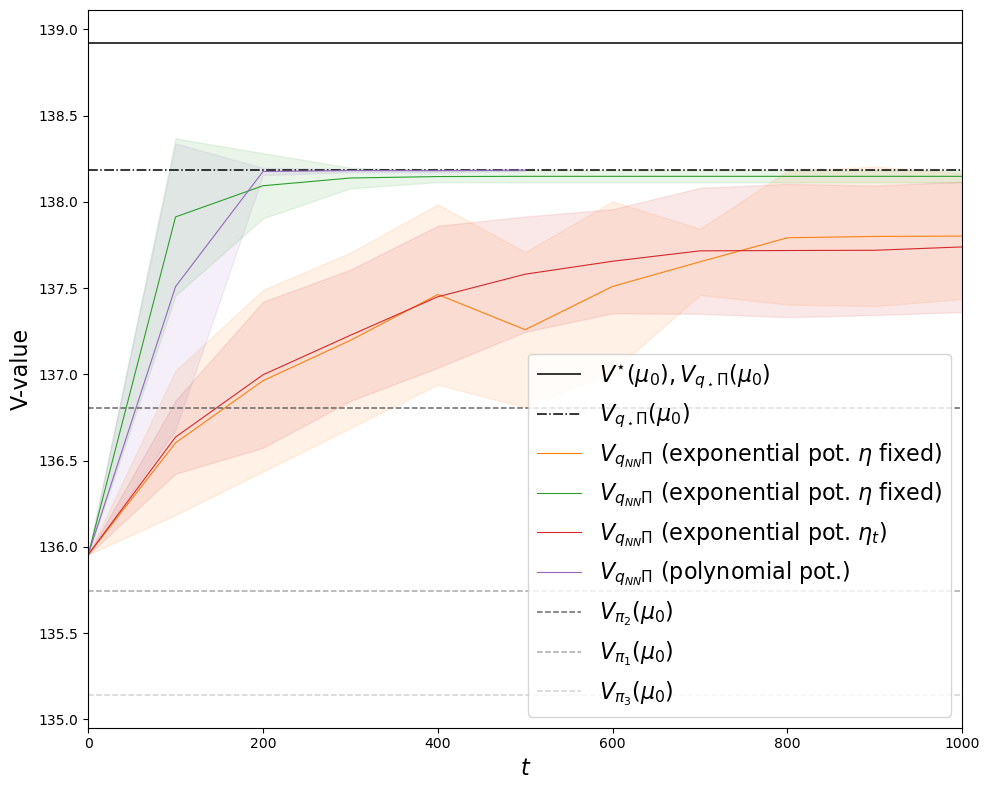

In [12]:
values_list = []

updates_x = np.array(range(82)) * 100 #* 5000
updates_NN = np.array(range(22)) * 100 

figure(figsize=(10, 8))

updates_x = np.arange(len(rewards_expw1_mean)) * 10 * 10


plt.hlines(V_star_pi0, 0, updates_x[-1], 'black',  linewidth=1.1, label = '$V^{\star}(\mu_0), V_{q_\star\Pi}(\mu_0)$')
plt.hlines(V_opt_pi0, 0, updates_x[-1], 'black', ls ='dashdot',  linewidth=1.1, label = '$V_{q_\star\Pi}(\mu_0)$')


# plt.plot(updates_x, rewards_agg_b_expw1[0], label='policy NN with tabular A')
# plt.plot(updates_x, rewards_agg_b_expw2[0], label='tabular policy with A NN')
# plt.plot(updates_x, rewards_agg_b_expw3[1], label='mix 1')
# plt.plot(updates_x, rewards_agg_b_expw4[0], label='mix 2')


ci1 = 2 * rewards_expw1_std
plt.plot(updates_x, rewards_expw1_mean, 'C1', linewidth=.8, label='$V_{q_{NN}\Pi}$ (exponential pot. $\eta$ fixed)')
plt.fill_between(updates_x, (rewards_expw1_mean-ci1), (rewards_expw1_mean+ci1), color='C1', alpha=.1)

ci2 = 2 * rewards_expw2_std 
plt.plot(updates_x, rewards_expw2_mean, 'C2', linewidth=.8, label='$V_{q_{NN}\Pi}$ (exponential pot. $\eta$ fixed)')
plt.fill_between(updates_x, (rewards_expw2_mean-ci2), (rewards_expw2_mean+ci2), color='C2', alpha=.1)

ci3 = 2 * rewards_expw3_std
plt.plot(updates_x, rewards_expw3_mean, 'C3', linewidth=.8, label='$V_{q_{NN}\Pi}$ (exponential pot. $\eta_t$)')
plt.fill_between(updates_x, (rewards_expw3_mean-ci3), (rewards_expw3_mean+ci3), color='C3', alpha=.1)

ci4 = 2 * rewards_expw4_std
plt.plot(updates_x, rewards_expw4_mean, 'C4', linewidth=.8, label='$V_{q_{NN}\Pi}$ (polynomial pot.)')
plt.fill_between(updates_x, (rewards_expw4_mean-ci4), (rewards_expw4_mean+ci4), color='C4', alpha=.1)

        
c = ['dimgrey', 'darkgrey', 'lightgrey', 'grey', 'darkgrey']
count = 0
    
V_exp_sorted = sorted(V_exp_pi0.items(), key=lambda x:x[1], reverse= True)

for item in V_exp_sorted:
    plt.hlines(item[1], 0, updates_x[-1], c[count], linestyle='dashed', linewidth=1.1, label = '$V_{\pi_' + str(exp_ind[item[0]] +1 ) + '}(\mu_0)$')
    count += 1


plt.xlabel('$t$', fontsize=16)
plt.ylabel('V-value', fontsize=16)
plt.xlim((0, 1000))
# plt.ylim((1.08, 1.09))
#plt.title('Values comparison')
plt.legend(loc='lower right', fontsize=16)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('figures/policies_learning_comparison.pdf')